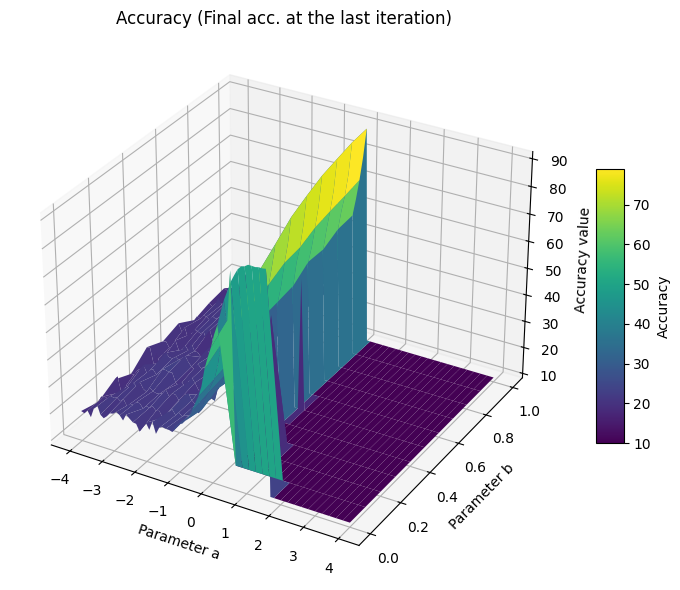

In [3]:
import numpy as np
import matplotlib.pyplot as plt


file_name = 'test_acc_final' # 'test_acc_final', 'test_acc_best'
value = np.load(f'./npy/{file_name}.npy')
x = np.arange(-4.0, 4.1, 0.1)   # -4.0 ~ 4.0
y = np.arange(0.0, 1.1, 0.1)  # 0.0 ~ 1.0
X, Y = np.meshgrid(x, y, indexing='ij')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, value,
                       cmap='viridis',    # color: 'plasma', 'inferno' etc.
                       edgecolor='none')

ax.set_xlabel('Parameter a')
ax.set_ylabel('Parameter b')
ax.set_zlabel('Accuracy value')
if file_name == 'test_acc_final':
    title_name = 'Accuracy (Final acc. at the last iteration)'
else:
    title_name = 'Accuracy (Best acc. during training)'
ax.set_title(title_name)

fig.colorbar(surf, shrink=0.5, aspect=10, label='Accuracy')

plt.tight_layout()
plt.show()


import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=value, colorscale="Viridis", showscale=False)])
fig.update_traces(hovertemplate="a: %{x:.1f}<br>b: %{y:.1f}<br>acc: %{z}<extra></extra>")
fig.update_layout(
    title=title_name,
    scene=dict(
        xaxis_title="Parameter a",
        yaxis_title="Parameter b",
        zaxis_title="Accuracy",
        camera=dict(eye=dict(x=-1.6, y=-1.2, z=1.2))
    ),
    width=600,
    height=600
 )
fig.show()
fig.write_html(f"./html/{file_name}.html")

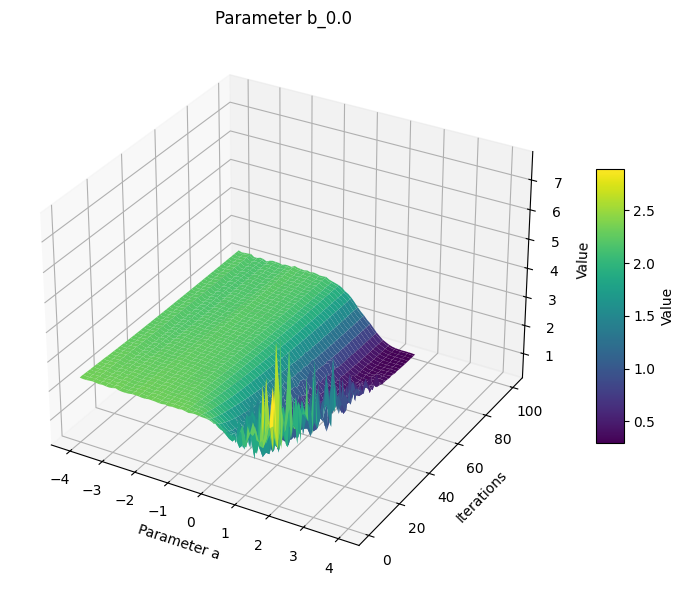

In [19]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(-4.0, 4.1, 0.1)   # -4.0 ~ 4.0
y = np.arange(1, 101)  # 1 ~ 100
X, Y = np.meshgrid(x, y, indexing='ij')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


z_name = 'test_loss' # 'train_loss', 'train_acc', 'test_loss', 'test_acc', 'best_acc'
p_name = 'b_0.0' # 'a_0.0', 'b_0.0' etc.
value = np.load(f'./npy/{z_name}/{z_name}_{p_name}.npy')

surf = ax.plot_surface(X, Y, value,
                       cmap='viridis',    # color: 'plasma', 'inferno' etc.
                       edgecolor='none')

ax.set_xlabel('Parameter a')
ax.set_ylabel('Iterations')
ax.set_zlabel('Value')
ax.set_title(f'Parameter {p_name}')

fig.colorbar(surf, shrink=0.5, aspect=10, label='Value')

plt.tight_layout()
plt.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=value, colorscale="Viridis", showscale=False)])
fig.update_traces(hovertemplate="a: %{x:.1f}<br>b: %{y:.1f}<br>acc: %{z}<extra></extra>")
fig.update_layout(
    title=f"{z_name}_{p_name}",
    scene=dict(
        xaxis_title="Parameter a",
        yaxis_title="Iterations",
        zaxis_title="Value",
        camera=dict(eye=dict(x=-1.6, y=-1.2, z=1.2))
    ),
    width=600,
    height=600
 )
fig.show()

fig.write_html(f"./html/{z_name}_{p_name}.html")

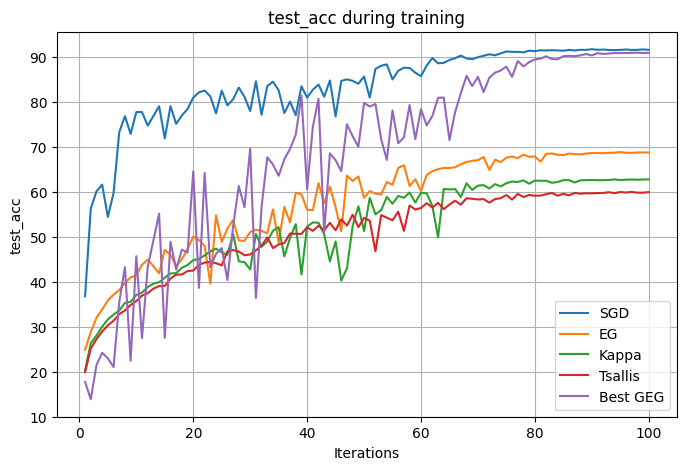

In [45]:
import numpy as np
import matplotlib.pyplot as plt

log_info = ['train_loss', 'train_acc', 'test_loss', 'test_acc']
log_idx = 3

v0 = np.load('./npy/standard/sgd.npy')[log_idx]
v1 = np.load('./npy/standard/eg.npy')[log_idx]
v2 = np.load('./npy/standard/kappa.npy')[log_idx]
v3 = np.load('./npy/standard/tsallis.npy')[log_idx]

geg = np.load(f'./npy/{log_info[log_idx]}.npy')
# a=1.6, b=0.0
best_geg = geg[56,0,:]
# a=0.0, b=1.0
# best_geg = geg[40,10,:]

vectors = [v0, v1, v2, v3, best_geg]
vector_names = ['SGD', 'EG', 'Kappa', 'Tsallis', 'Best GEG']

x = np.arange(1, 101)

plt.figure(figsize=(8, 5))

for i, v in enumerate(vectors):
    plt.plot(x, v, label=vector_names[i])

plt.xlabel("Iterations")
plt.ylabel(f"{log_info[log_idx]}")
plt.title(f"{log_info[log_idx]} during training")
plt.legend()
plt.grid(True)

plt.show()